In [9]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
file_path = '/PhD_project/data/processed_sim_data/E_log_gaus_noise_pn_1/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

# Define constants
Q = 3.41e13  # Example value for Q
I_y = 0.06  # Example value for I_y
I_z = 0.03  # Example value for I_z
H = 5  # Example value for H
error = 0.14  # Example value for error

# Calculate the Concentration values
data['Calculated_Concentration'] = np.log10(Q / (2 * np.pi * I_y * I_z * data['x']**2) * 
                                          np.exp(-data['y']**2 / (2 * I_y**2 * data['x']**2)) * 
                                          (np.exp(-(data['z'] - H)**2 / (2 * I_z**2 * data['x']**2)) + 
                                           np.exp(-(data['z'] + H)**2 / (2 * I_z**2 * data['x']**2))))

data['Concentration_Error'] = error*data['Calculated_Concentration']

# Calculate the log likelihood
data['Log_Likelihood'] = -0.5 * ((data['Concentration'] - data['Calculated_Concentration'])**2)/data['Concentration_Error']**2

# Display the first few rows of the dataframe with the new column
display(data.head())

print(data['Log_Likelihood'].sum())

,Unnamed: 0,x,y,z,Concentration,Concentration_true,Calculated_Concentration,Concentration_Error,Log_Likelihood
0,0,184.775907,-76.536686,5.0,0.674958,0.674868,0.674868,0.094482,-4.517392e-07
1,1,184.775907,76.536686,5.0,0.674885,0.674868,0.674868,0.094482,-1.481942e-08
2,2,198.288972,-26.105238,5.0,9.945873,9.933857,9.933857,1.390740,-3.732532e-05
3,3,198.288972,26.105238,5.0,9.928979,9.933857,9.933857,1.390740,-6.150731e-06
4,4,198.288972,26.105238,5.0,9.917068,9.933857,9.933857,1.390740,-7.286675e-05


-0.029635536376671247


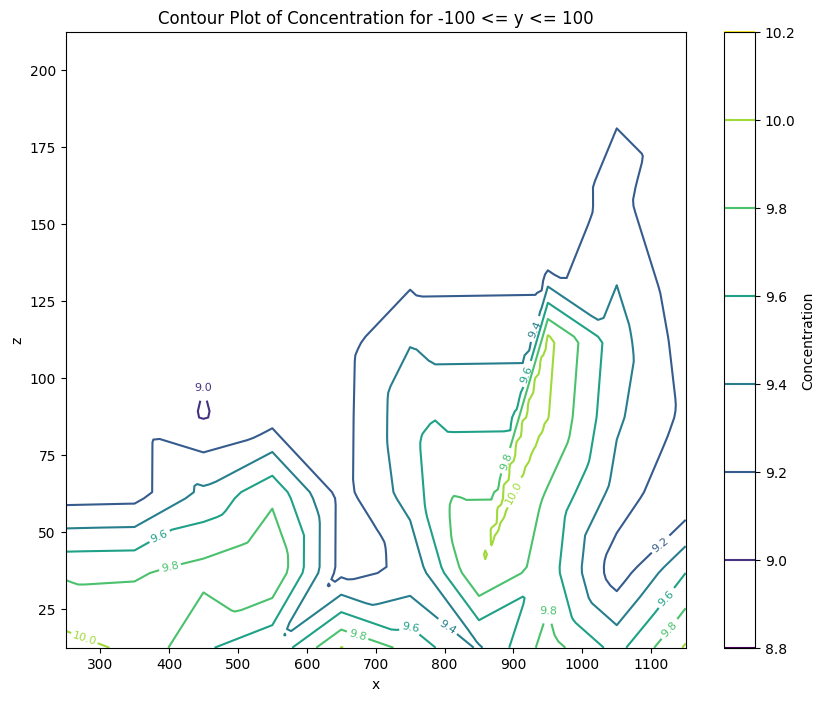

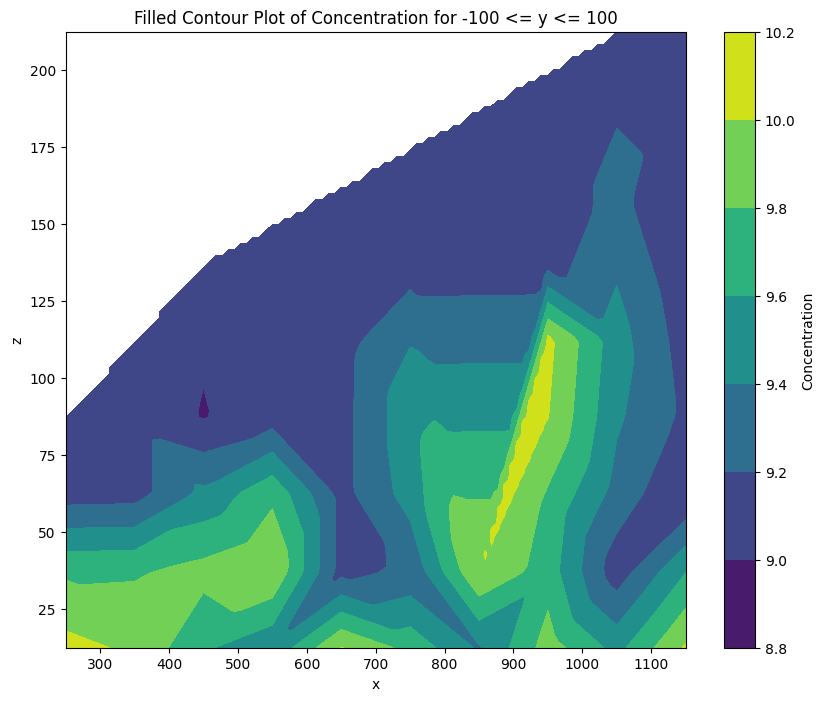

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the data from the CSV file
new_file_path = '/PhD_project/data/processed_raw_data/GBR_data_gridded_100_100_25/data.csv'
new_data = pd.read_csv(new_file_path)

# Ensure column names are consistent
new_data.columns = new_data.columns.str.lower()

# Define epsilon
epsilon = 100  # Adjust this value as needed

# Query the data for -epsilon <= y <= epsilon
filtered_data = new_data[(new_data['y'] >= -epsilon) & (new_data['y'] <= epsilon)]

# Extract x, z, and Concentration from the filtered data
x = filtered_data['x'].values
z = filtered_data['z'].values
concentration = filtered_data['concentration'].values

# Create a regular grid for interpolation
x_grid = np.linspace(x.min(), x.max(), 100)  # 100 points along x
z_grid = np.linspace(z.min(), z.max(), 100)  # 100 points along z
x_grid, z_grid = np.meshgrid(x_grid, z_grid)

# Interpolate using griddata
grid_concentration = griddata(
    points=(x, z),               # Original data points
    values=concentration,        # Values to interpolate
    xi=(x_grid, z_grid),         # Grid to interpolate onto
    method='linear'              # Interpolation method ('linear', 'cubic', 'nearest')
)

# Plot contours with fewer levels
plt.figure(figsize=(10, 8))
contour = plt.contour(x_grid, z_grid, grid_concentration, levels=5, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to the contours
plt.title(f'Contour Plot of Concentration for -{epsilon} <= y <= {epsilon}')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar(contour, label='Concentration')
plt.show()

# Plot filled contours with fewer levels
plt.figure(figsize=(10, 8))
filled_contour = plt.contourf(x_grid, z_grid, grid_concentration, levels=5, cmap='viridis')
plt.title(f'Filled Contour Plot of Concentration for -{epsilon} <= y <= {epsilon}')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar(filled_contour, label='Concentration')
plt.show()


/tmp/ipykernel_34586/2886270788.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_measured_data.loc[:, 'calculated_concentration'] = np.log10(


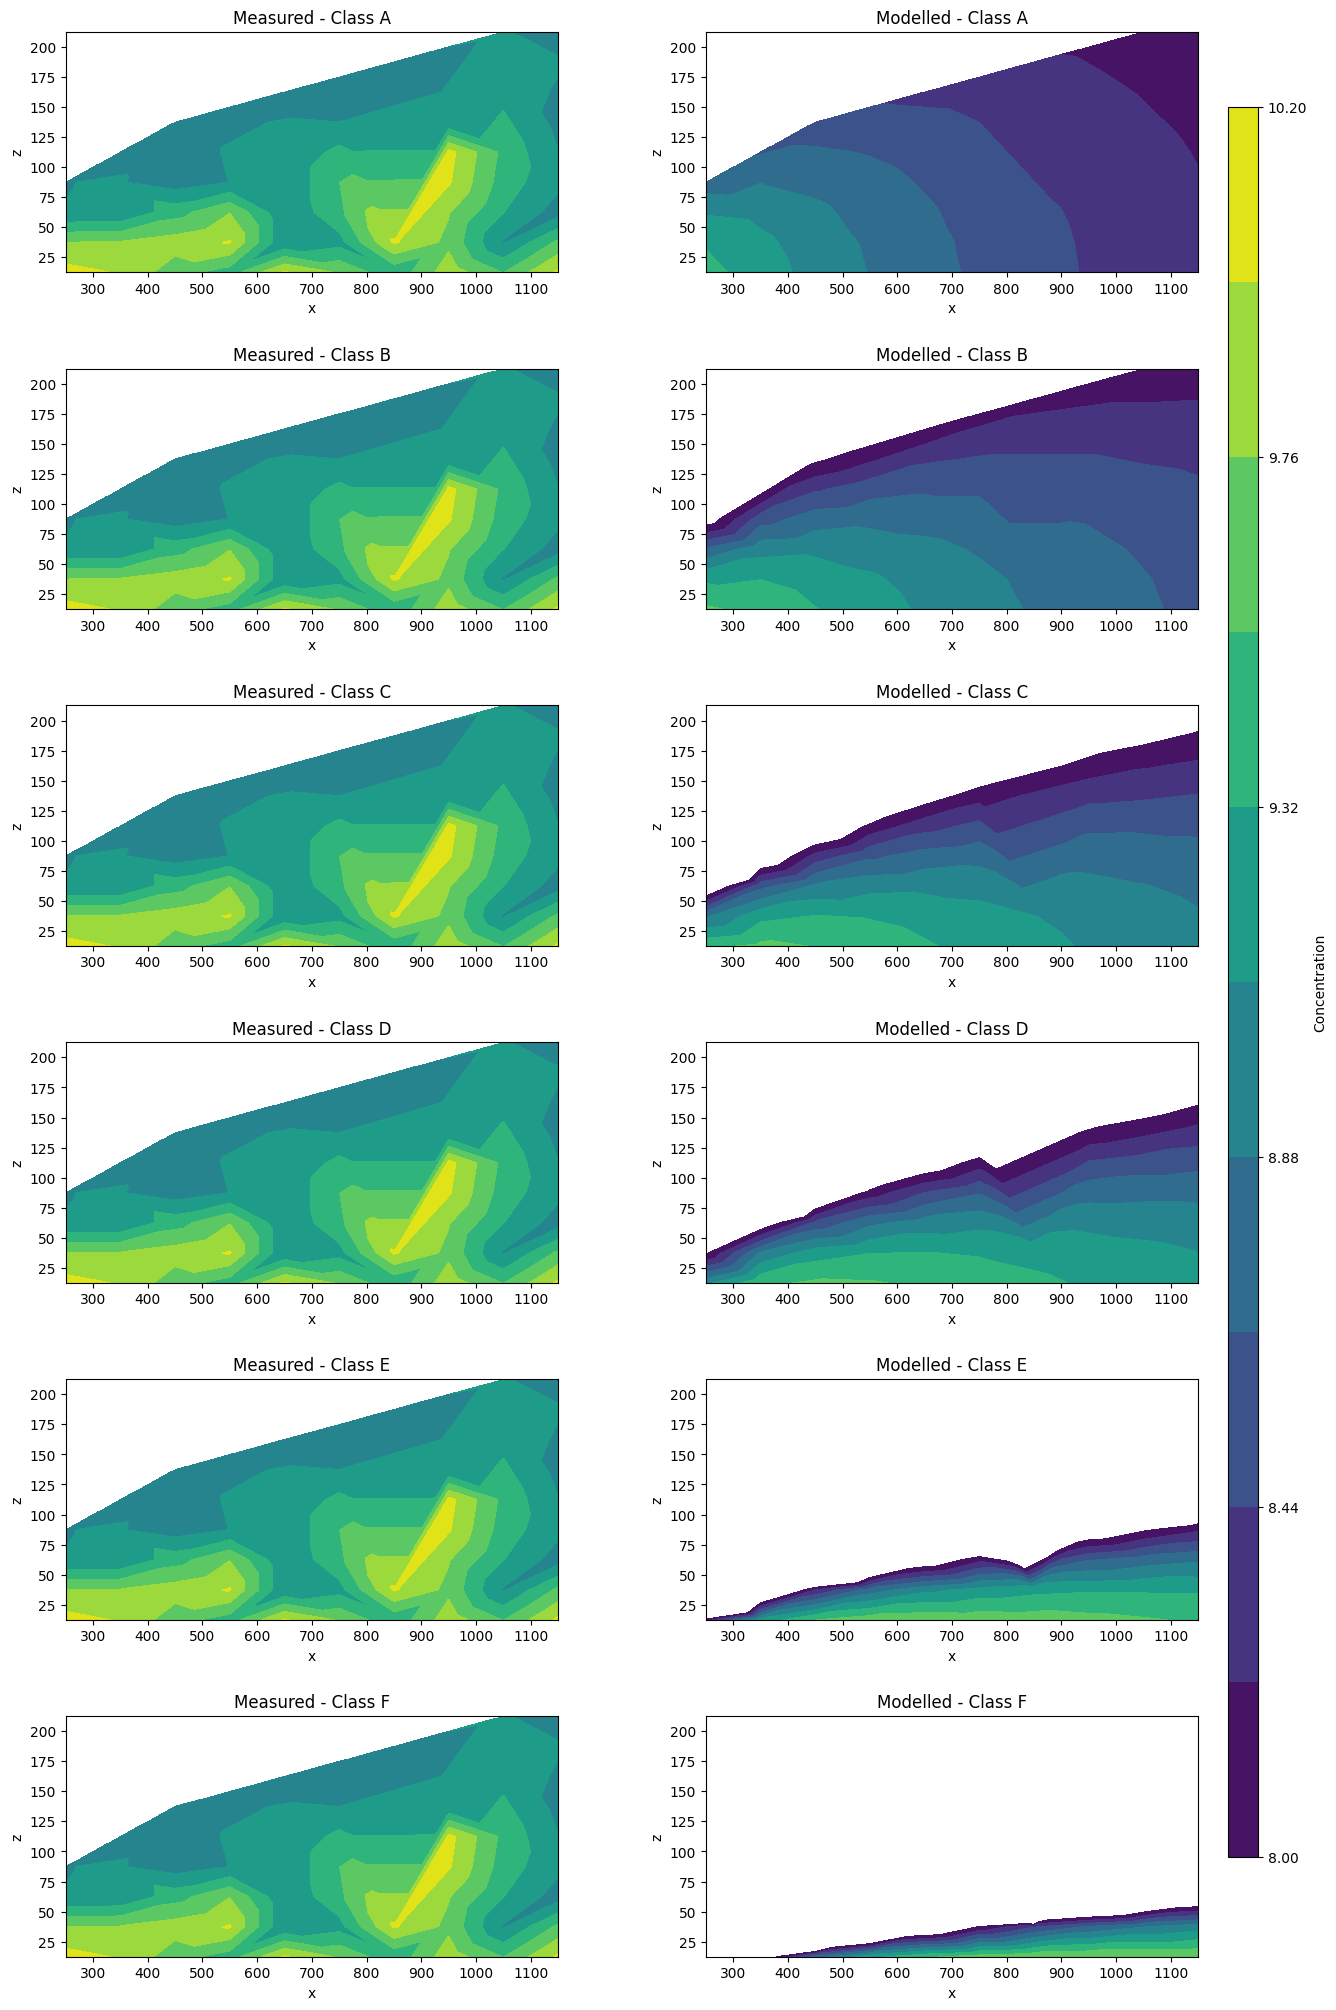

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the measured data from the CSV file
new_file_path = '/PhD_project/data/processed_raw_data/GBR_data_gridded_100_100_25/data.csv'
new_data = pd.read_csv(new_file_path)

# Ensure column names are consistent
new_data.columns = new_data.columns.str.lower()

# Define constants for the model
Q = 3.41e13  # Example value for Q
H = 5  # Example value for H
epsilon = 100  # Adjust this value as needed

# Classes and corresponding I_y and I_z values
classes = ['A', 'B', 'C', 'D', 'E', 'F']
I_y_values = [0.22, 0.16, 0.11, 0.08, 0.06, 0.04]
I_z_values = [0.2, 0.12, 0.08, 0.06, 0.03, 0.016]

# Query the measured data for -epsilon <= y <= epsilon
filtered_measured_data = new_data[(new_data['y'] >= -epsilon) & (new_data['y'] <= epsilon)]

# Extract x, z, and Concentration for the measured data
x_measured = filtered_measured_data['x'].values
z_measured = filtered_measured_data['z'].values
concentration_measured = filtered_measured_data['concentration'].values

# Create a regular grid for interpolation
x_grid = np.linspace(x_measured.min(), x_measured.max(), 500)  # Adjust grid resolution
z_grid = np.linspace(z_measured.min(), z_measured.max(), 500)
x_grid, z_grid = np.meshgrid(x_grid, z_grid)

# Interpolate the measured data using griddata
grid_concentration_measured = griddata(
    points=(x_measured, z_measured),
    values=concentration_measured,
    xi=(x_grid, z_grid),
    method='linear'
)

# Create a figure with 6 rows and 2 columns
fig, axes = plt.subplots(len(classes), 2, figsize=(15, 25), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.3, 'hspace': 0.4})
vmin = 8
vmax = 10.2
levels = np.linspace(vmin, vmax, 11)

for i, class_label in enumerate(classes):
    I_y = I_y_values[i]
    I_z = I_z_values[i]

    # Calculate modelled concentration values for the current class
    filtered_measured_data.loc[:, 'calculated_concentration'] = np.log10(
        Q / (2 * np.pi * I_y * I_z * filtered_measured_data['x']**2) *
        np.exp(-filtered_measured_data['y']**2 / (2 * I_y**2 * filtered_measured_data['x']**2)) *
        (np.exp(-(filtered_measured_data['z'] - H)**2 / (2 * I_z**2 * filtered_measured_data['x']**2)) +
         np.exp(-(filtered_measured_data['z'] + H)**2 / (2 * I_z**2 * filtered_measured_data['x']**2)))
    )

    # Extract x, z, and calculated concentrations for the modelled data
    x_modelled = filtered_measured_data['x'].values
    z_modelled = filtered_measured_data['z'].values
    concentration_modelled = filtered_measured_data['calculated_concentration'].values

    # Interpolate the modelled data using griddata
    grid_concentration_modelled = griddata(
        points=(x_modelled, z_modelled),
        values=concentration_modelled,
        xi=(x_grid, z_grid),
        method='linear'
    )

    # Plot measured data
    ax_measured = axes[i, 0]
    contour_measured = ax_measured.contourf(x_grid, z_grid, grid_concentration_measured, levels=levels, cmap='viridis', vmin=vmin, vmax=vmax)
    ax_measured.set_title(f'Measured - Class {class_label}')
    ax_measured.set_xlabel('x')
    ax_measured.set_ylabel('z')

    # Plot modelled data
    ax_modelled = axes[i, 1]
    contour_modelled = ax_modelled.contourf(x_grid, z_grid, grid_concentration_modelled, levels=levels, cmap='viridis', vmin=vmin, vmax=vmax)
    ax_modelled.set_title(f'Modelled - Class {class_label}')
    ax_modelled.set_xlabel('x')
    ax_modelled.set_ylabel('z')

# Adjust layout to make space for a shared colorbar
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(contour_measured, cax=cbar_ax, label='Concentration')

plt.show()


/tmp/ipykernel_27185/3134815925.py:74: RuntimeWarning: divide by zero encountered in log10
  modelled_concentration = np.log10(


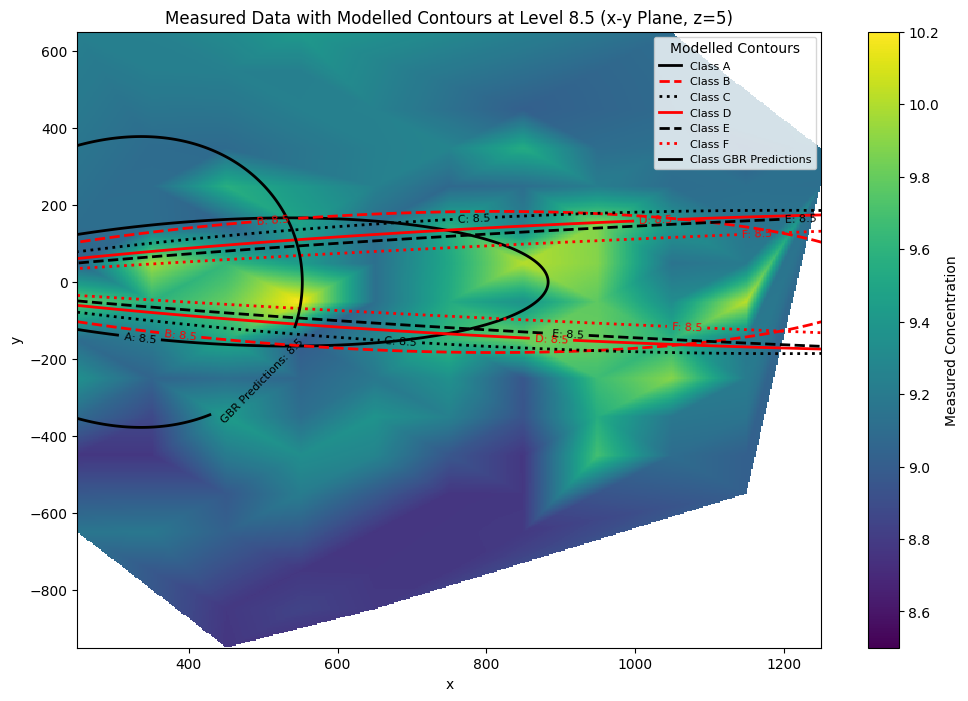

/tmp/ipykernel_27185/3134815925.py:146: RuntimeWarning: divide by zero encountered in log10
  modelled_concentration = np.log10(


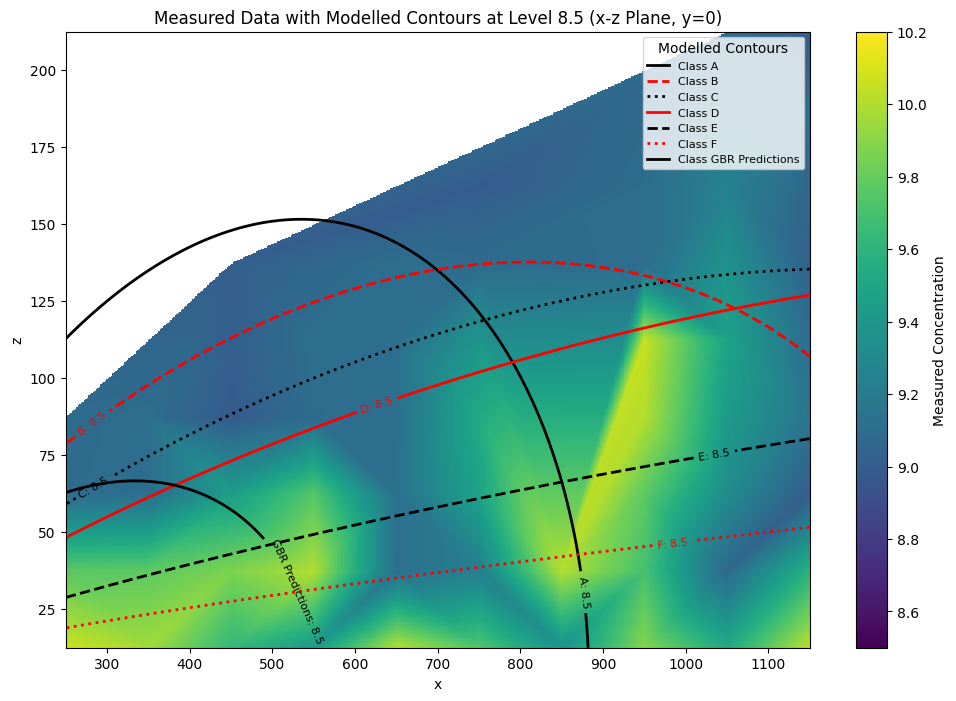

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the measured data from the CSV file
file_path = '/PhD_project/data/processed_raw_data/GBR_data_gridded_100_100_25/data.csv'
data = pd.read_csv(file_path)

# Ensure column names are consistent
data.columns = data.columns.str.lower()

# Define constants for the model
Q = 3.41e13  # Example value for Q
H = 5  # Fixed value for z in x-y plane
epsilon = 100  # Range around fixed planes
y_fixed = 0  # Fixed value for y in x-z plane

# Classes and corresponding I_y and I_z values
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'GBR Predictions']
I_y_values = [0.22, 0.16, 0.11, 0.08, 0.06, 0.04, 0.80]
I_z_values = [0.2, 0.12, 0.08, 0.06, 0.03, 0.016, 0.14]

# Define linestyles and colors for contours
linestyles = ['solid', 'dashed', 'dotted']
colors = ['black', 'red']

def plot_x_y_plane():
    # Filter measured data for -epsilon + H <= z <= H + epsilon
    filtered_data = data[(data['z'] >= -epsilon + H) & (data['z'] <= H + epsilon)]

    # Extract x, y, and measured concentration
    x_measured = filtered_data['x'].values
    y_measured = filtered_data['y'].values
    concentration_measured = filtered_data['concentration'].values

    # Create a regular grid for interpolation
    x_grid = np.linspace(x_measured.min(), x_measured.max(), 500)
    y_grid = np.linspace(y_measured.min(), y_measured.max(), 500)
    x_grid, y_grid = np.meshgrid(x_grid, y_grid)

    # Interpolate the measured data
    grid_concentration_measured = griddata(
        points=(x_measured, y_measured),
        values=concentration_measured,
        xi=(x_grid, y_grid),
        method='linear'
    )

    # Plot heatmap of measured data
    plt.figure(figsize=(12, 8))
    heatmap = plt.imshow(
        grid_concentration_measured,
        extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()],
        origin='lower',
        cmap='viridis',
        aspect='auto',
        interpolation='nearest',
        vmin=8.5, vmax=10.2
    )
    plt.colorbar(heatmap, label='Measured Concentration')

    # Generate x and y values for modelled concentration
    x_model = np.linspace(x_measured.min(), x_measured.max(), 500)
    y_model = np.linspace(y_measured.min(), y_measured.max(), 500)
    x_model, y_model = np.meshgrid(x_model, y_model)

    # Overlay modelled contours
    for i, class_label in enumerate(classes):
        I_y = I_y_values[i]
        I_z = I_z_values[i]

        # Modelled concentration at z=5
        modelled_concentration = np.log10(
            Q / (2 * np.pi * I_y * I_z * x_model**2) *
            np.exp(-y_model**2 / (2 * I_y**2 * x_model**2)) *
            (np.exp(-(H - H)**2 / (2 * I_z**2 * x_model**2)) +
             np.exp(-(H + H)**2 / (2 * I_z**2 * x_model**2)))
        )

        linestyle = linestyles[i % len(linestyles)]
        color = colors[i % len(colors)]

        # Add contour
        contour = plt.contour(
            x_model, y_model, modelled_concentration,
            levels=[8.5], colors=color, linewidths=2, linestyles=linestyle
        )
        plt.clabel(contour, inline=True, fmt={8.5: f'{class_label}: 8.5'}, fontsize=8)
        plt.plot([], [], color=color, linestyle=linestyle, linewidth=2, label=f'Class {class_label}')

    # Add labels and legend
    plt.title('Measured Data with Modelled Contours at Level 8.5 (x-y Plane, z=5)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(title='Modelled Contours', loc='upper right', fontsize=8)
    plt.show()


def plot_x_z_plane():
    # Filter measured data for -epsilon <= y <= epsilon
    filtered_data = data[(data['y'] >= -epsilon) & (data['y'] <= epsilon)]

    # Extract x, z, and measured concentration
    x_measured = filtered_data['x'].values
    z_measured = filtered_data['z'].values
    concentration_measured = filtered_data['concentration'].values

    # Create a regular grid for interpolation
    x_grid = np.linspace(x_measured.min(), x_measured.max(), 500)
    z_grid = np.linspace(z_measured.min(), z_measured.max(), 500)
    x_grid, z_grid = np.meshgrid(x_grid, z_grid)

    # Interpolate the measured data
    grid_concentration_measured = griddata(
        points=(x_measured, z_measured),
        values=concentration_measured,
        xi=(x_grid, z_grid),
        method='linear'
    )

    # Plot heatmap of measured data
    plt.figure(figsize=(12, 8))
    heatmap = plt.imshow(
        grid_concentration_measured,
        extent=[x_grid.min(), x_grid.max(), z_grid.min(), z_grid.max()],
        origin='lower',
        cmap='viridis',
        aspect='auto',
        interpolation='nearest',
        vmin=8.5, vmax=10.2
    )
    plt.colorbar(heatmap, label='Measured Concentration')

    # Generate x and z values for modelled concentration
    x_model = np.linspace(x_measured.min(), x_measured.max(), 500)
    z_model = np.linspace(z_measured.min(), z_measured.max(), 500)
    x_model, z_model = np.meshgrid(x_model, z_model)

    # Overlay modelled contours
    for i, class_label in enumerate(classes):
        I_y = I_y_values[i]
        I_z = I_z_values[i]

        # Modelled concentration at y=0
        modelled_concentration = np.log10(
            Q / (2 * np.pi * I_y * I_z * x_model**2) *
            np.exp(-y_fixed**2 / (2 * I_y**2 * x_model**2)) *
            (np.exp(-(z_model - H)**2 / (2 * I_z**2 * x_model**2)) +
             np.exp(-(z_model + H)**2 / (2 * I_z**2 * x_model**2)))
        )

        linestyle = linestyles[i % len(linestyles)]
        color = colors[i % len(colors)]

        # Add contour
        contour = plt.contour(
            x_model, z_model, modelled_concentration,
            levels=[8.5], colors=color, linewidths=2, linestyles=linestyle
        )
        plt.clabel(contour, inline=True, fmt={8.5: f'{class_label}: 8.5'}, fontsize=8)
        plt.plot([], [], color=color, linestyle=linestyle, linewidth=2, label=f'Class {class_label}')

    # Add labels and legend
    plt.title('Measured Data with Modelled Contours at Level 8.5 (x-z Plane, y=0)')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.legend(title='Modelled Contours', loc='upper right', fontsize=8)
    plt.show()


# Generate plots for both planes
plot_x_y_plane()
plot_x_z_plane()


/tmp/ipykernel_34586/1213539481.py:72: RuntimeWarning: divide by zero encountered in log10
  modelled_concentration = np.log10(


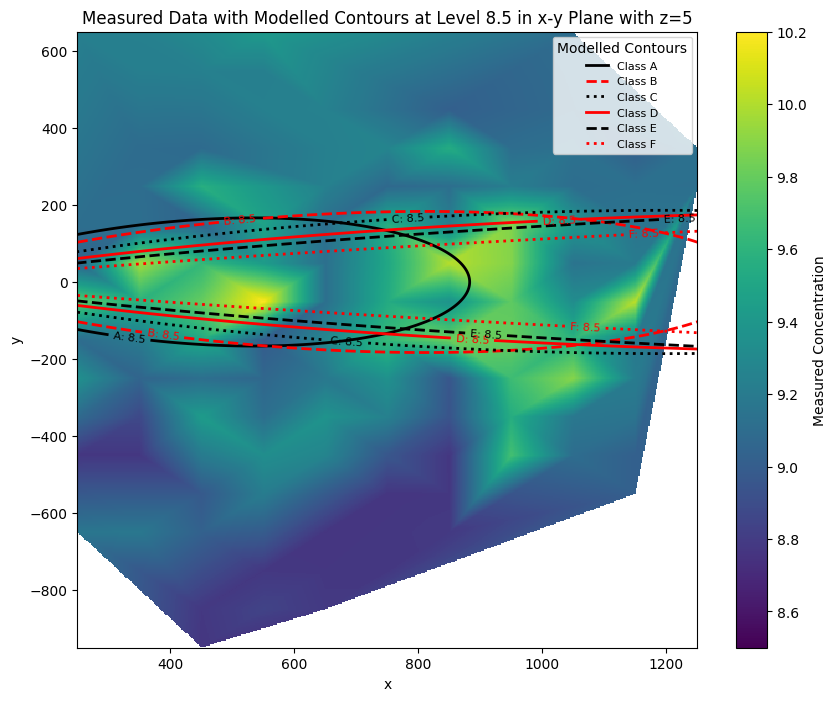

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the measured data from the CSV file
file_path = '/PhD_project/data/processed_raw_data/GBR_data_gridded_100_100_25/data.csv'
data = pd.read_csv(file_path)

# Ensure column names are consistent
data.columns = data.columns.str.lower()

# Define constants for the model
Q = 3.41e13  # Example value for Q
H = 5  # Fixed value for z in x-y plane
epsilon = 100  # Range around fixed planes
y_fixed = 0  # Fixed value for y in x-z plane

# Classes and corresponding I_y and I_z values
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'I_y, I_z = 0.3']
I_y_values = [0.22, 0.16, 0.11, 0.08, 0.06, 0.04, 0.3]
I_z_values = [0.2, 0.12, 0.08, 0.06, 0.03, 0.016, 0.3]

# Define linestyles and colors for contours
linestyles = ['solid', 'dashed', 'dotted']
colors = ['black', 'red']

def plot_x_y_plane():
    # Filter measured data for -epsilon + H <= z <= H + epsilon
    filtered_data = data[(data['z'] >= -epsilon + H) & (data['z'] <= H + epsilon)]

    # Extract x, y, and measured concentration
    x_measured = filtered_data['x'].values
    y_measured = filtered_data['y'].values
    concentration_measured = filtered_data['concentration'].values

    # Create a regular grid for interpolation
    x_grid = np.linspace(x_measured.min(), x_measured.max(), 500)
    y_grid = np.linspace(y_measured.min(), y_measured.max(), 500)
    x_grid, y_grid = np.meshgrid(x_grid, y_grid)

    # Interpolate the measured data
    grid_concentration_measured = griddata(
        points=(x_measured, y_measured),
        values=concentration_measured,
        xi=(x_grid, y_grid),
        method='linear'
    )

    # Plot heatmap of measured data
    plt.figure(figsize=(12, 8))
    heatmap = plt.imshow(
        grid_concentration_measured,
        extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()],
        origin='lower',
        cmap='viridis',
        aspect='auto',
        interpolation='nearest',
        vmin=8.5, vmax=10.2
    )
    plt.colorbar(heatmap, label='Measured Concentration')

    # Generate x and y values for modelled concentration
    x_model = np.linspace(x_measured.min(), x_measured.max(), 500)
    y_model = np.linspace(y_measured.min(), y_measured.max(), 500)
    x_model, y_model = np.meshgrid(x_model, y_model)

    # Overlay modelled contours
    for i, class_label in enumerate(classes):
        I_y = I_y_values[i]
        I_z = I_z_values[i]

        # Modelled concentration at z=5
        modelled_concentration = np.log10(
            Q / (2 * np.pi * I_y * I_z * x_model**2) *
            np.exp(-y_model**2 / (2 * I_y**2 * x_model**2)) *
            (np.exp(-(H - H)**2 / (2 * I_z**2 * x_model**2)) +
             np.exp(-(H + H)**2 / (2 * I_z**2 * x_model**2)))
        )

        linestyle = linestyles[i % len(linestyles)]
        color = colors[i % len(colors)]

        # Add contour
        contour = plt.contour(
            x_model, y_model, modelled_concentration,
            levels=[8.5], colors=color, linewidths=2, linestyles=linestyle
        )
        plt.clabel(contour, inline=True, fmt={8.5: f'{class_label}: 8.5'}, fontsize=8)
        plt.plot([], [], color=color, linestyle=linestyle, linewidth=2, label=f'Class {class_label}')

    # Add labels and legend
    plt.title('Measured Data with Modelled Contours at Level 8.5 (x-y Plane, z=5)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(title='Modelled Contours', loc='upper right', fontsize=8)
    plt.show()


def plot_x_z_plane():
    # Filter measured data for -epsilon <= y <= epsilon
    filtered_data = data[(data['y'] >= -epsilon) & (data['y'] <= epsilon)]

    # Extract x, z, and measured concentration
    x_measured = filtered_data['x'].values
    z_measured = filtered_data['z'].values
    concentration_measured = filtered_data['concentration'].values

    # Create a regular grid for interpolation
    x_grid = np.linspace(x_measured.min(), x_measured.max(), 500)
    z_grid = np.linspace(z_measured.min(), z_measured.max(), 500)
    x_grid, z_grid = np.meshgrid(x_grid, z_grid)

    # Interpolate the measured data
    grid_concentration_measured = griddata(
        points=(x_measured, z_measured),
        values=concentration_measured,
        xi=(x_grid, z_grid),
        method='linear'
    )

    # Plot heatmap of measured data
    plt.figure(figsize=(12, 8))
    heatmap = plt.imshow(
        grid_concentration_measured,
        extent=[x_grid.min(), x_grid.max(), z_grid.min(), z_grid.max()],
        origin='lower',
        cmap='viridis',
        aspect='auto',
        interpolation='nearest',
        vmin=8.5, vmax=10.2
    )
    plt.colorbar(heatmap, label='Measured Concentration')

    # Generate x and z values for modelled concentration
    x_model = np.linspace(x_measured.min(), x_measured.max(), 500)
    z_model = np.linspace(z_measured.min(), z_measured.max(), 500)
    x_model, z_model = np.meshgrid(x_model, z_model)

    # Overlay modelled contours
    for i, class_label in enumerate(classes):
        I_y = I_y_values[i]
        I_z = I_z_values[i]

        # Modelled concentration at y=0
        modelled_concentration = np.log10(
            Q / (2 * np.pi * I_y * I_z * x_model**2) *
            np.exp(-y_fixed**2 / (2 * I_y**2 * x_model**2)) *
            (np.exp(-(z_model - H)**2 / (2 * I_z**2 * x_model**2)) +
             np.exp(-(z_model + H)**2 / (2 * I_z**2 * x_model**2)))
        )

        linestyle = linestyles[i % len(linestyles)]
        color = colors[i % len(colors)]

        # Add contour
        contour = plt.contour(
            x_model, z_model, modelled_concentration,
            levels=[8.5], colors=color, linewidths=2, linestyles=linestyle
        )
        plt.clabel(contour, inline=True, fmt={8.5: f'{class_label}: 8.5'}, fontsize=8)
        plt.plot([], [], color=color, linestyle=linestyle, linewidth=2, label=f'Class {class_label}')

    # Add labels and legend
    plt.title('Measured Data with Modelled Contours at Level 8.5 (x-z Plane, y=0)')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.legend(title='Modelled Contours', loc='upper right', fontsize=8)
    plt.show()


# Generate plots for both planes
plot_x_y_plane()
plot_x_z_plane()

